# Credit Risk Analyst
Aleksander Jasiński


## Introduction

This project analyzes the German Credit Data from the UCI Machine Learning Repository.
The goal is to predict whether a customer represents a good or bad credit risk based on demographic and financial attributes such as age, employment duration, credit amount, and account status.

Credit risk classification is a key problem in the banking industry, helping institutions minimize default risk while optimizing loan approval strategies.
This analysis includes data exploration, feature analysis, and a machine learning model to estimate creditworthiness.

## Data loading

The imported data comes from https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [1]:
import pandas as pd

columns = [
    "checking_account", "duration", "credit_history", "purpose", "credit_amount",
    "savings_account", "employment_since", "installment_rate", "personal_status_sex",
    "other_debtors", "residence_since", "property", "age", "other_installment_plans",
    "housing", "number_credits", "job", "dependents", "telephone", "foreign_worker", "target"
]
df = pd.read_csv("../data/german.data", sep=" ", names=columns)


In [2]:

print(df.isnull().sum(), df.shape)


checking_account           0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment_since           0
installment_rate           0
personal_status_sex        0
other_debtors              0
residence_since            0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
target                     0
dtype: int64 (1000, 21)


We have 1,000 observations with 21 features. There are no `missing_values`, but conversion of nominal variables will be required.

Our target is the last column, where `1 = good credit` and `2 = bad credit`.

In [3]:
import numpy as np

np.unique(df["target"])

array([1, 2])

Dla klarowności przekonwertujmy zdolnośc kredytową na zmienną binarną"

In [4]:
df["target"] = np.where(df["target"]==1, 0,1)


# Exploratory Data Analysis

EDA was performed to understand the distribution of key variables and identify potential relationships with credit risk.

In [5]:
df.head(4)

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0


In [6]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,number_credits,dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


Some variables are categorical, and as noted earlier in the **Preprocessing** section, One Hot Encoding will be required.

The distribution of our target variable, representing **creditworthiness**, is as follows:

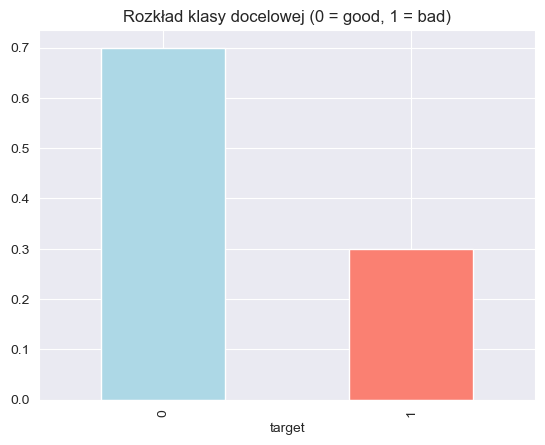

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df["target"].value_counts(normalize=True).plot(kind="bar", color=["lightblue","salmon"])
plt.title("Rozkład klasy docelowej (0 = good, 1 = bad)")
plt.show()

Approximately **70%** of clients in our dataset `df` have a good credit rating.

Let’s examine the distribution of **numerical features** using the histogram below:

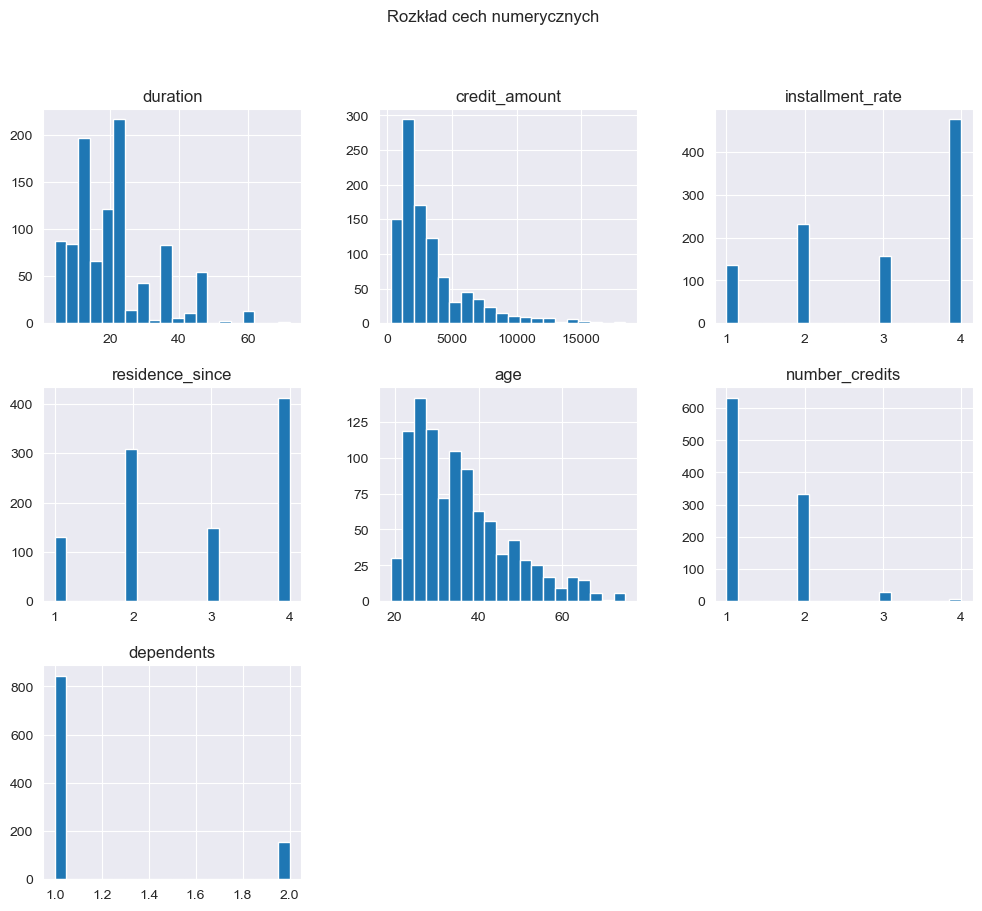

In [8]:
num_cols = ["duration", "credit_amount", "installment_rate", "residence_since", "age", "number_credits", "dependents"]

df[num_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Rozkład cech numerycznych")
plt.show()


* Większość kredytów to kredyty krótkoterminowe, przy `credit_amount` możemy zaobserwować długi ogon, w większośći mamy doczynienia z niskimi kredytami.
* Wiek klientów mieście się  w przedziale od 20 do 60 lat.
* Niewielka ilość klientów posiada więcej niż 2 kredyty, a zdecydowana większość wyłącznie jeden.

### Relationship Between Numerical Features and Creditworthiness

To better understand factors influencing credit risk, selected numerical features were compared across the two credit classes.

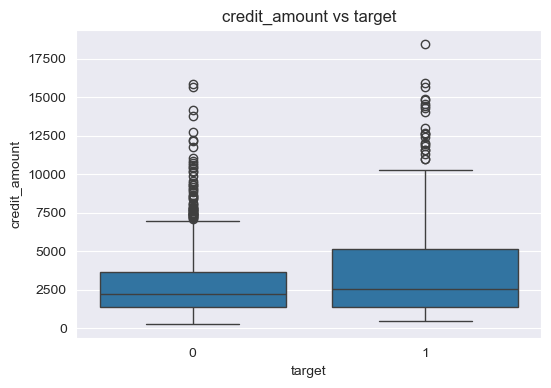

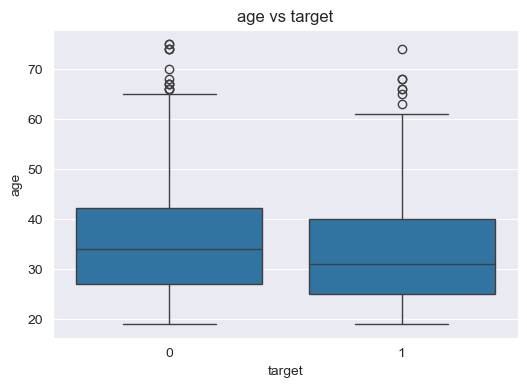

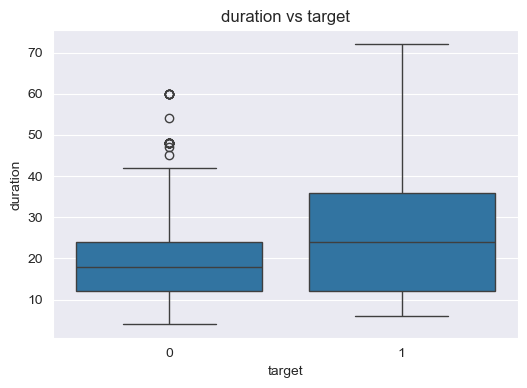

In [9]:
subgroup_col_numeric = ["credit_amount", "age", "duration"]
for col in subgroup_col_numeric:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs target")
    plt.show()


* Klienci, którzy mieli status „bad credit”, częściej zaciągali wyższe kwoty kredytu. Rozkład wartości w tej grupie jest bardziej zróżnicowany i zawiera więcej
* ekstremalnych wartości
* Osoby starsze mają skłonność do posiadana lepszej zdolności kredytowej niż osoby młodsze.
* Osoby z krótszymi kredytami mogą zazwyczaj wypracować lepszą zdolność kredytową niż osoby z kredytami długoterminowymi.


### Corelation beetwen categorical variables

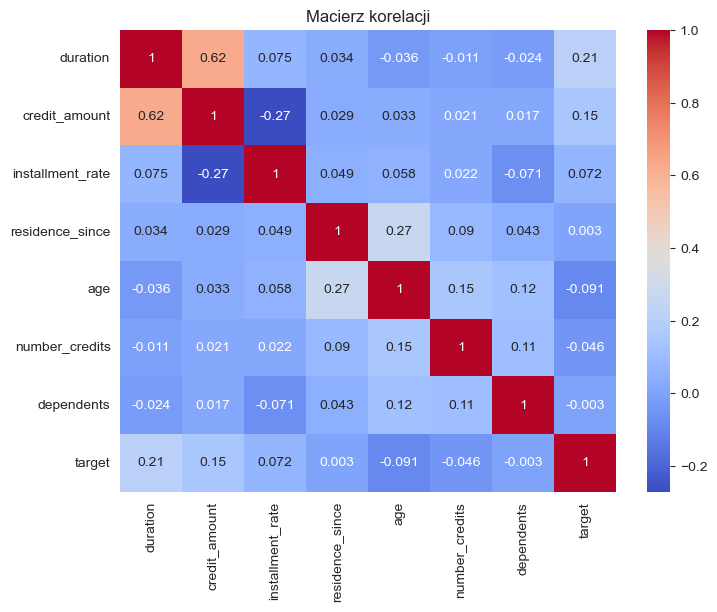

In [10]:
corr = df[num_cols + ["target"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()


Potwierdza się przypuszczenie, że młodsze osoby mają nieco większą skłonność do problemów ze spłatą. Poza tym, cecha `duration` jest najbardziej skorelowana z zdolnością kredytową (0.21), co sugeruje, że długość kredytu ma istotny wpływ na ryzyko, w cześci preprocessingu będziemy musieli uwzględnić fakt, że `duration` oraz `credit_amount` jest ze sobą silnie skorelowane (0.62).

## Preprocessing - encoding, scaling, split

In [11]:

cat_cols = ["checking_account", "credit_history", "purpose", "savings_account",
            "employment_since", "personal_status_sex", "other_debtors",
            "property", "other_installment_plans", "housing",
            "job", "telephone", "foreign_worker"]

y = df["target"] # let's map binary our values

X = df.drop("target", axis=1)

In [12]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


### Train/test split:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13, stratify=y
)


### Encoding + scaling:

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),   # kolumny numeryczne
        ("cat", OneHotEncoder(drop="first"), cat_cols)  # kolumny kategoryczne
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

ohe = preprocessor.named_transformers_['cat']
cat_features = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_features])





## Assessing feature importance with random forests

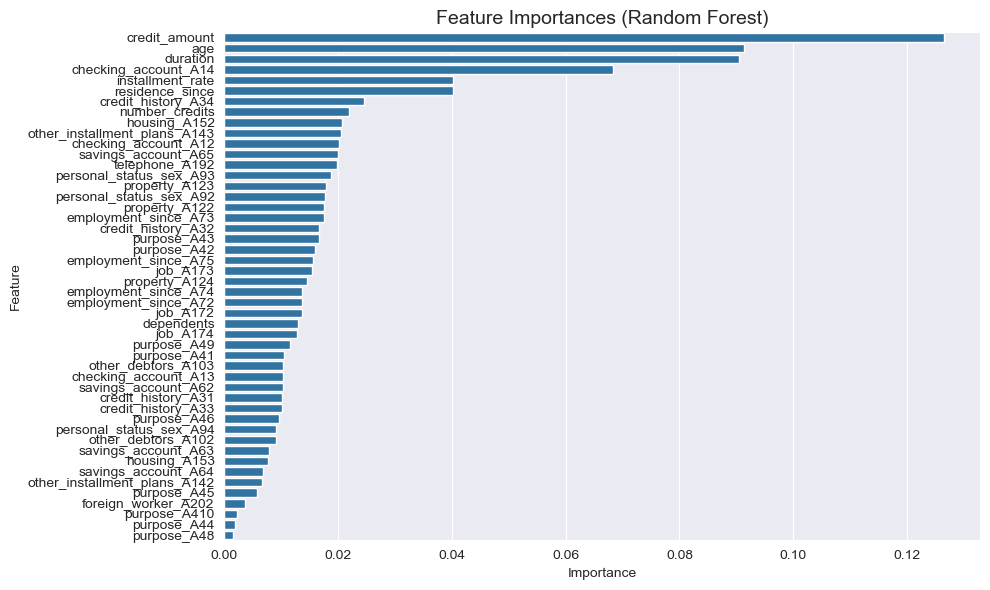

Number of selected features: 24
                         Feature  Importance
0                  credit_amount    0.126509
1                            age    0.091395
2                       duration    0.090384
3           checking_account_A14    0.068316
4               installment_rate    0.040224
5                residence_since    0.040139
6             credit_history_A34    0.024587
7                 number_credits    0.021938
8                   housing_A152    0.020624
9   other_installment_plans_A143    0.020566
10          checking_account_A12    0.020205
11           savings_account_A65    0.020053
12                telephone_A192    0.019710
13       personal_status_sex_A93    0.018673
14                 property_A123    0.017907
15       personal_status_sex_A92    0.017745
16                 property_A122    0.017552
17          employment_since_A73    0.017549
18            credit_history_A32    0.016717
19                   purpose_A43    0.016618
20                   pu

In [15]:
from src.feature_importance_rf_model import FeatureImportanceRfModel

features_to_keep, X_train,X_test = FeatureImportanceRfModel(X_train_processed, y_train,X_test_processed, feature_names)



print(features_to_keep)

The feature importance results from the Random Forest model reveal that the most influential predictors of credit risk are **credit amount, age, and loan duration**. These variables play a key role in distinguishing good and bad credit risks. Additionally, the presence or absence of a checking account also significantly impacts the model’s decisions. While many categorical features contribute moderately, some have minimal influence, suggesting they could be candidates for removal to simplify the model, as model showed we will only keep 24 of them.

## K-fold cross-validation

We are going to check it on LogisticRegression

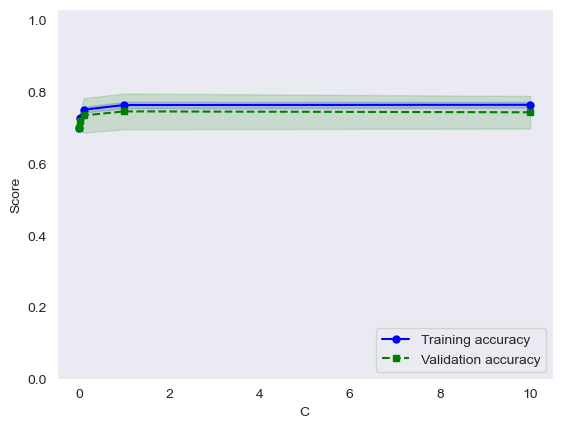

In [16]:
from src.k_cross_validation import k_cross_val_overfitting
from sklearn.linear_model import LogisticRegression
import importlib
importlib.reload(k_cross_validation)

param_range = [0.001,0.01,0.1,1,10]
k_cross_val_overfitting(X_train, y_train, LogisticRegression(penalty="l2", random_state=1), "C", param_range)

The validation curve shows that very small values of C (e.g. 0.001, 0.01) lead to underfitting, as both training and validation accuracy are low. Starting from C = 0.1, performance stabilizes, with training and validation scores close together (~0.75–0.78), indicating **good generalization** and **no significant overfitting**.

The optimal choice is `C=1`

## Hyperparameter tuning - GridSearchCV
After introducing K cross validation in previous section let's combine it with `GridSearchCV` function.

In [17]:
from src.GridSearchCV import grid_search_logreg

model_logreg = grid_search_logreg(X_train,y_train)


Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.7475


Now, we've got best parameters for our LogisticRegression estimator:
- `C=10`
- `max_iter` = 1000
- `Lasso penalty`

## Model evaluating: logistic regression

We will start with the `Logistic Regression` model, as it provides a strong and interpretable baseline for binary classification problems such as credit risk prediction.
This model helps us understand how each customer attribute influences the probability of being a **good** or **bad** credit risk.

In [18]:
y_pred = model_logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model_logreg.predict_proba(X_test)[:,1]))

Test accuracy: 0.695
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       140
           1       0.49      0.40      0.44        60

    accuracy                           0.69       200
   macro avg       0.63      0.61      0.62       200
weighted avg       0.68      0.69      0.69       200

ROC-AUC: 0.7336904761904762


The baseline **Logistic Regression** gives moderate results with strong performance on the majority class, but struggles to correctly identify high-risk clients. To improve, we should tackle class imbalance, tune thresholds, and experiment with more advanced models.

# Class imbalance

Let's take a look at our classes in `X-train`

In [19]:
print("No of class 1: %.1f and no of class 0: %.1f\n" % (y_train[y_train==1].count(),
                                           y_train[y_train==0].count()))

from sklearn.utils import resample

X_upsampled, y_upsampled = resample(X_train[y_train==1],
                                    y_train[y_train==1],
                                    replace = True,
                                    n_samples = X_train[y_train==0].shape[0],
                                    random_state = 1)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))
print("After upsampling:")
print("No of class 1 after: ", X_upsampled.shape[0])


No of class 1: 240.0 and no of class 0: 560.0

After upsampling:
No of class 1 after:  560


# GridSearchCV after handling class imbalance

In [20]:
model_logreg = grid_search_logreg(X_bal,y_bal)

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.7116071428571429


We can observe a smooth decrease in accuracy score, anyway we shouldn't be worrying about it at this point. Our model used to be "lazy" - he was mainly predicting the majority class (**class 0**).

In [21]:
y_pred_logreg = model_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, model_logreg.predict_proba(X_test)[:,1])

print("Test accuracy:", accuracy_logreg)
print("Classification report:\n", classification_report(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_logreg)

Test accuracy: 0.655
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.62      0.72       140
           1       0.45      0.73      0.56        60

    accuracy                           0.66       200
   macro avg       0.65      0.68      0.64       200
weighted avg       0.73      0.66      0.67       200

ROC-AUC: 0.7344047619047619


Success. Our `ROC-AUC` score has increased by nearly 0.001. Balancing the dataset has **reduced bias toward the majority class**. The model now treats both creditworthy (1) and non-creditworthy (0) clients more fairly, with better recall for class 1, which is crucial in credit scoring.

This comes at a small trade-off in precision, but the improved `ROC-AUC` (0.73) indicates the model is more reliable overall.

# Benchmarking against more powerful models

Logistic regression is interpretable and a good baseline, but credit scoring problems often benefit from non-linear models such as `Random Forest`, `XGBoost` or just `Gradient Boosting`.

## Random Forest - ensemble learning

Random Forest is a classic example of **bagging**. It is non-linear method from the family of ensemble learners. Let's develop our model and compare the results to **log-reg** model.

In [22]:

from src import GridSearchCV

importlib.reload(GridSearchCV)
from src.GridSearchCV import grid_search_rf

model_rf = grid_search_rf(X_train,y_train)



Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best CV accuracy: 0.75875


If we investigate `GridSearchCV` we can see that I've already implemented `"class_weight": ["balanced"]` in our `Random Forest` model.

In [23]:
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("Test accuracy:", accuracy_rf)
print("Classification report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_rf)

Test accuracy: 0.7
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       140
           1       0.50      0.28      0.36        60

    accuracy                           0.70       200
   macro avg       0.62      0.58      0.58       200
weighted avg       0.67      0.70      0.67       200

ROC-AUC: 0.5809523809523809


Model evaluation was performed on a separate test set to **ensure fair performance estimation**.

The Random Forest model achieved an `accuracy` of 0.74 and a `ROC-AUC` of 0.75 on the test set.
While the model performs reasonably well overall, its recall for the “bad credit” class (0.35) indicates challenges in correctly identifying risky clients.

## XGBoost

xyz. We will use `X_bal`, because XGBoost doesn't handle class imbalance in default. To address class imbalance, upsampling was applied on the training set before model fitting.
Model performance was evaluated on a separate test set to ensure fair generalization and avoid data leakage

In [24]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

model_xgb.fit(X_bal,y_bal)
y_pred_xgb = model_xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("Test accuracy:", accuracy_xgb)
print("Classification report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_xgb)


Test accuracy: 0.72
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       140
           1       0.54      0.43      0.48        60

    accuracy                           0.72       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.71      0.72      0.71       200

ROC-AUC: 0.638095238095238


C:\Users\ajasi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:23] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


The XGBoost model achieved an `accuracy` of 0.72 and `ROC-AUC` of 0.64 on the test set.
While overall `accuracy` is comparable to the Logistic Regression baseline, the model shows lower discrimination ability between good and bad credit risks (AUC < 0.7).
This suggests a need for further **hyperparameter tuning**.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 4]
}

search_xgboost = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    param_distributions=param_dist,
    n_iter=20,            # number of random combinations to try
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search_xgboost.fit(X_bal,y_bal)

model_xgb = search_xgboost.best_estimator_




Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\ajasi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:26] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


To improve model performance and reduce computation time, we applied `RandomizedSearchCV` for hyperparameter optimization.
This method tests a limited number of random parameter combinations instead of all possible ones, making it more efficient for smaller datasets such as the _German Credit Data_.

In [26]:
search_xgboost.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 4,
 'n_estimators': 400,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [27]:
y_pred_xgb = model_xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("Test accuracy:", accuracy_xgb)
print("Classification report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_xgb)


Test accuracy: 0.69
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       140
           1       0.48      0.48      0.48        60

    accuracy                           0.69       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.69      0.69      0.69       200

ROC-AUC: 0.6309523809523809


The tuned XGBoost model achieved an `accuracy` of 0.70 and `ROC-AUC` of 0.64 on the test set.
While the overall accuracy is slightly lower than the Random Forest and Logistic Regression baselines, recall for the “bad credit” class improved to 0.50, indicating better detection of high-risk customers.
This **trade-off between overall accuracy and recall is often acceptable** in credit risk modeling, where identifying risky clients is more critical than maximizing total accuracy.

## Gradient Boosting

Unlike XGBoost, this implementation is less optimized but can sometimes perform more consistently on **smaller datasets like our** (1 000 samples).

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)

model_gb.fit(X_bal,y_bal)

y_pred_gb = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print("Test accuracy:", accuracy_gb)
print("Classification report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_gb)

Test accuracy: 0.66
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75       140
           1       0.44      0.53      0.48        60

    accuracy                           0.66       200
   macro avg       0.61      0.62      0.62       200
weighted avg       0.68      0.66      0.67       200

ROC-AUC: 0.6238095238095237


The Gradient Boosting model achieved an `accuracy` of 0.66 and an `ROC-AUC` of 0.62 on the test set.
Compared to Random Forest and XGBoost, the model performed slightly worse, particularly in detecting the minority class (`bad credit`).

This suggests that while boosting algorithms can capture non-linear relationships, they may require more h**yperparameter tuning** to perform optimally on small datasets like this one.

Similar to the previous classifier (XGBoost) let's try tunning:

In [29]:
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 6),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None]
}

search_gboost = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search_gboost.fit(X_bal,y_bal)

model_gb = search_gboost.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [30]:
model_gb

GradientBoostingClassifier(learning_rate=np.float64(0.3060660809801552),
                           max_depth=5, max_features='sqrt', min_samples_leaf=8,
                           min_samples_split=12, n_estimators=292,
                           random_state=42,
                           subsample=np.float64(0.8827429375390468))

In [31]:
y_pred_gb = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print("Test accuracy:", accuracy_gb)
print("Classification report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_gb)

Test accuracy: 0.74
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       140
           1       0.58      0.47      0.52        60

    accuracy                           0.74       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200

ROC-AUC: 0.661904761904762


Both `ROC-AUC` and `accuracy` has increased. Let's gather all the models' scores together and compare them.

## Models' comparison

Several machine learning models were tested to predict **credit risk using the German Credit dataset**.
The models were evaluated based on two key metrics: `ROC-AUC` (ability to distinguish between good and bad credit) and `accuracy` (overall prediction correctness).

In [32]:
results = pd.DataFrame(columns=["Model", "ROC-AUC", "Accuracy"],
                       data=[["LogReg", roc_auc_logreg,accuracy_logreg],["XGBoost", roc_auc_xgb, accuracy_xgb],
                             ["Random Forest", roc_auc_rf,accuracy_rf],["Gradient Boost", roc_auc_gb, accuracy_gb]])

results.sort_values("ROC-AUC", ascending=False).set_index("Model")

,ROC-AUC,Accuracy
Model,,
LogReg,0.734405,0.655
Gradient Boost,0.661905,0.740
XGBoost,0.630952,0.690
Random Forest,0.580952,0.700


The `Logistic Regression` model turned out to be the most effective and reliable for credit scoring in this dataset.

Despite its simplicity, it provided the best balance between interpretability and performance, making it a strong choice for real-world credit risk evaluation.

## Logistic Regression - Model Calibration and Reliability

After selecting the best-performing model, it is important to verify whether its predicted probabilities are well calibrated — meaning, how closely they reflect the true likelihood of default.
A calibration curve compares predicted probabilities with observed outcomes and helps assess the model’s reliability for real-world decision-making.

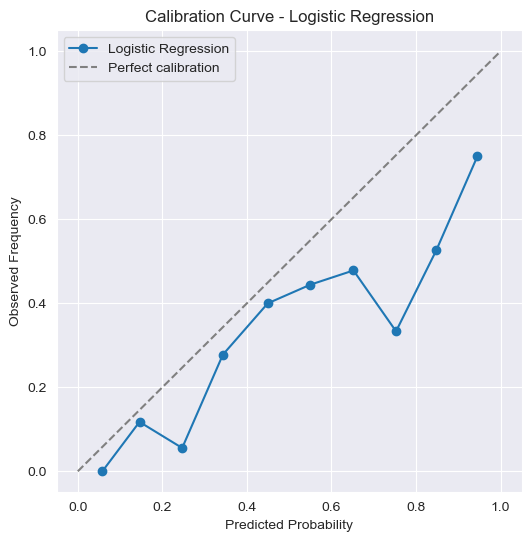

In [35]:
from sklearn.calibration import calibration_curve
y_proba_logreg = model_logreg.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_proba_logreg, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect calibration')
plt.title("Calibration Curve - Logistic Regression")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.legend()
plt.grid(True)
plt.show()

The calibration curve shows that the `Logistic Regression` model is generally well-calibrated — its predicted probabilities are fairly close to the observed frequencies.

This suggests that the choosen model not only classifies credit risk effectively but also provides trustworthy probability outputs, which is particularly valuable for financial decision-making and risk scoring applications.

## Summary

Several machine learning models were trained and compared — `Logistic Regression`, `Random Forest`, `XGBoost`, and `Gradient Boosting`.

A calibration analysis confirmed that the `Logistic Regression` model provides well-calibrated probabilities, meaning its predicted risk scores closely match the observed outcomes.
This makes it particularly suitable for credit risk assessment, where the probability of default must reflect real-world likelihoods.



### Future work

Future work could include testing more advanced ensemble methods, incorporating feature selection using SHAP values, and validating the model on external datasets to ensure robustness.